In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
path = os.getcwd()


In [2]:
def order_points(points):
                len_ = len(points)
                a = points[0][0]
                b = points[len_-1][0]
                if a[0]>b[0] and a[1]>b[1]:
                       points =  points[::-1]                
                return points
def arrange_points(points):
    number = np.array([a[0] for a in points])
    x_cen = 0
    y_cen = 0
    for [x, y] in number:
        x_cen = x_cen + x
        y_cen = y_cen + y
    x_cen = x_cen // 4
    y_cen = y_cen // 4
    # img = cv2.circle(img,(x_cen,y_cen),2 , (0,0,255), -1)
    sorted_x = np.array([[[0, 0]], [[0, 0]], [[0, 0]], [[0, 0]]])
    for [x, y] in number:
        if x <= x_cen and y <= y_cen:
            sorted_x[0][0] = np.array([x, y])
        if x <= x_cen and y >= y_cen:
            sorted_x[1][0] = np.array([x, y])
        if x >= x_cen and y >= y_cen:
            sorted_x[2][0] = np.array([x, y])
        if x >= x_cen and y <= y_cen:
            sorted_x[3][0] = np.array([x, y])
    points = np.array(sorted_x)
    return  points

In [10]:
def decode_graycode():        
        def inversegrayCode(n): 
            inv = 0
            while(n): 
                inv = inv ^ n
                n = n >> 1
            return inv
            ##############################
      
        img1= cv2.imread(path + "/sample_data/graycode/40.png",0)
        img2 = cv2.imread(path + "/sample_data/graycode/41.png",0)
        gray  = cv2.cvtColor(img,)
        mask = np.where( img2-img1 <50 ,np.uint8(0),np.uint8(255))
        contour,hiearchy = cv2.findContours(mask,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        cnts = sorted(contour,key=lambda x:cv2.contourArea(x) , reverse = True)[:1]
        approx = None
        for cnt in cnts:
            epsilon = 0.01 * cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, epsilon, True)
        approx  = arrange_points(approx)   
        #print(approx) 
        mask = np.zeros(img2.shape,np.uint8)
        mask[approx[0][0][1]:approx[2][0][1],approx[0][0][0]:approx[2][0][0]] = np.uint8(255)        
        ansx = np.zeros(mask.shape,np.uint16)
        ansy = np.zeros(mask.shape,np.uint16) 
        for i in range(0,10):
                 name1= path + "/sample_data/graycode/"+str(i)+'.png'
                 rough1 = np.zeros(mask.shape,np.uint8)  
                 name2 = path + "/sample_data/graycode/"+str(i+20)+'.png'         
                 img1= cv2.imread(name1,0)
                 img2 =cv2.imread(name2,0)
                 a = mask & img1
                 b = mask & img2
                 rough1 = np.where( a>b ,1,0)  
                 ansx = ansx + (rough1)*(2**(9-i))
                 rough1= np.where(a>b,np.uint8(255),np.uint8(0))
                 rough2 = np.zeros(mask.shape,np.uint8)
                 name1= path + "/sample_data/graycode/"+str(i+10)+ '.png'
                 name2 = path + "/sample_data/graycode/"+str(i+30)+'.png'         
                 img1= cv2.imread(name1,0)
                 img2 =cv2.imread(name2,0)
                 a  =mask & img1
                 b = mask & img2
                 rough2 = np.where( a>b,1,0)                 
                 ansy =ansy + (rough2)*(2**(19-i))
                 rough2= np.where(a>b,np.uint8(255),np.uint8(0))
                 cv2.imshow('img1',rough1.astype(np.uint8))
                 cv2.imshow('img2',rough2.astype(np.uint8))
                 cv2.waitKey(1)
        cv2.destroyAllWindows()
        for row in range(720):
               for col in range(1280):
                        ansy[row][col] = inversegrayCode(ansy[row][col])
                        ansx[row][col] = inversegrayCode(ansx[row][col])
        return ansx,ansy, mask

In [4]:
print(path+"/sample_data/camera_calibration/")
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
fname = os.listdir(path+"/sample_data/camera_calibration/")
objp = np.zeros((9 * 7, 3), np.float32)
objp[:, :2] = np.mgrid[0:9, 0:7].T.reshape(-1, 2)*50.33

objpoints = []  # 3d point in real world space
imgpoints = []  # 2d points in image plane.
for name in fname:   
    if name[-4:] == '.png':
        img = cv2.imread(path+"/sample_data/camera_calibration/"+name)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, corners = cv2.findChessboardCorners(gray, (9, 7), None)
        if ret == True:
                objpoints.append(objp)
                corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
                corners2 = order_points(corners2)
                imgpoints.append(corners2)
                img = cv2.drawChessboardCorners(img, (9, 7), corners2, ret)
                cv2.imshow('camera', img)
                cv2.waitKey(1)
cv2.destroyAllWindows()  
ret,mtx_c,dist_c,rvec_c,tvec_c = cv2.calibrateCamera(objpoints,imgpoints,gray.shape[::-1],None,None)
print('camera matrix')
print(mtx_c, ret)

/home/saurabh/Structure-from-light/sample_data/camera_calibration/
camera matrix
[[1.48529494e+03 0.00000000e+00 6.37080018e+02]
 [0.00000000e+00 1.50892738e+03 5.77415745e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 0.33017090482614586


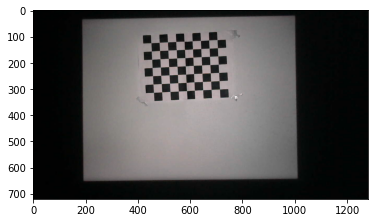

Projection Matrix  [[ 6.73740664e-04 -3.74272117e-05 -2.98114857e-01]
 [ 3.32924779e-05  6.46069467e-04 -8.58413618e-02]
 [ 4.15056679e-09 -2.55065296e-08  4.32495912e-04]]


In [5]:
# camera pose ####

img = cv2.imread(path+'/sample_data/camera_pose.png')
plt.imshow(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,corners = cv2.findChessboardCorners(gray ,(9,7),None)
corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
imgpoints  = np.array(corners,np.float32)
flag,rvec_c,tvec_c = cv2.solvePnP(objp,imgpoints,mtx_c,dist_c)
H_c = np.zeros((3,3))
world_points = []
R,_ = cv2.Rodrigues(rvec_c)
H_c[:,:2] = R[:,:2]
H_c[:,2] = tvec_c.transpose()[0]
H_c = mtx_c @ H_c
H_c = np.linalg.inv(H_c)
plt.show()
print("Projection Matrix ",H_c)

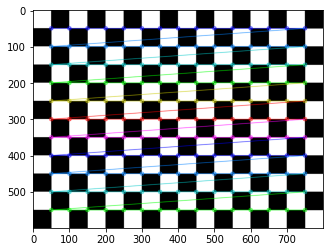

In [6]:
# projector points##################3
pose = cv2.imread(path+'/sample_data/chess.png')
gray = cv2.cvtColor(pose,cv2.COLOR_BGR2GRAY)
ret,corners = cv2.findChessboardCorners(gray,(15,11),None)
if ret:
        corners = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        corners = order_points(corners)    
        _ = cv2.drawChessboardCorners(pose,(15,11),corners,ret)
        img_points= np.array(corners,np.float32)    
plt.imshow(pose) 
plt.show()

In [7]:
fname = os.listdir(path+ "/sample_data/projector_calibration/")
projector_points = []
world_points = []
for name in fname: 
     point = []
     if name[-4:] == '.png':
        img1 = cv2.imread(path + "/sample_data/projector_calibration/" + name)
        img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
        img = ~img
        blur = cv2.GaussianBlur(img,(5,5),-1)
        img = cv2.addWeighted(img,1.5,blur,-0.5,0,img)
        ret,corners2 = cv2.findChessboardCorners(img,(15,11),None)
        if ret :
            corners2 = cv2.cornerSubPix(img,corners2,(11,11),(-1,-1),criteria)
            corners2 = order_points(corners2)
            _ = cv2.drawChessboardCorners(img1,(15,11),corners2,ret)
            for corner in corners2:
                b = cv2.convertPointsToHomogeneous(corner)
                b= b.reshape(3,1)
                a = H_c @ b
                point.append(a) 
            points = cv2.convertPointsFromHomogeneous(np.array(point))
            world_points.append(points)
            projector_points.append(img_points)
            cv2.imshow('img',img1)
            cv2.waitKey(1)
world = []
for p in world_points:
    w = np.array([np.array([i[0][0],i[0][1],0],np.float32) for i in p],np.float32)
    world.append(w)
cv2.destroyAllWindows()
ret,mtx_p,dist_p,rvec_p,tvec_p = cv2.calibrateCamera(world,projector_points,(800,600),None,None)
print(mtx_p, ret)

[[2.06015179e+03 0.00000000e+00 3.66219541e+02]
 [0.00000000e+00 2.08644628e+03 4.85525398e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 0.30600719629334466


In [8]:
path ='/home/saurabh/Structured_Light-master/sample_data'
os.chdir(path)
img = cv2.imread('projector_pose.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = ~gray
blur = cv2.GaussianBlur(gray,(5,5),-1)
gray = cv2.addWeighted(gray,1.5,blur,-0.5,0,gray)        
ret,corners = cv2.findChessboardCorners(gray ,(15,11),None)
print(ret)
corners = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
corners = order_points(corners)
imgpoints  = np.array(corners,np.float32)
point= []
for corner in corners:
                b = cv2.convertPointsToHomogeneous(corner)
                b= b.reshape(3,1)
                a = H_c @ b
                point.append(a) 
points = cv2.convertPointsFromHomogeneous(np.array(point)) 
w = np.array([np.array([np.array([i[0][0],i[0][1],0],np.float32) for i in points],np.float32)])
print(w.shape)

True
(1, 165, 3)


In [11]:
flag,rvec_p,tvec_p = cv2.solvePnP(w,imgpoints,mtx_p,dist_p)
H_p = np.zeros((3,4))
world_points = []
R,_ = cv2.Rodrigues(rvec_p)
H_p[:,:3] = R[:,:3]
H_p[:,3] = tvec_p.transpose()[0]
print(H_p)
H_p = mtx_p @ H_p
H_c = np.zeros((3,4))
R,_ = cv2.Rodrigues(rvec_c)
#print(R)
H_c[:,:3] = R[:,:3]
H_c[:,3] = tvec_c.transpose()[0]
print(H_c)
H_c = mtx_c @ H_c
ansy,ansx,mask = decode_graycode()
print(ansx.shape[:2])
plt.imshow(ansx)
plt.show()
plt.imshow(ansy)
plt.show()

[[ 9.97098823e-01  5.33073099e-02  5.43347761e-02  1.31147487e+02]
 [-4.76380798e-02  9.93768694e-01 -1.00769025e-01 -5.74370768e+02]
 [-5.93679251e-02  9.78882722e-02  9.93425053e-01  3.20120090e+03]]
[[ 9.98823082e-01  4.62521071e-02  1.46011181e-02 -2.94085043e+02]
 [-4.47347132e-02  9.94831328e-01 -9.11560962e-02 -7.18168094e+02]
 [-1.87418113e-02  9.03956362e-02  9.95729568e-01  2.31718369e+03]]
None


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [18]:
img = cv2.imread('41.png')
cy, cx = np.where(mask == 255)
r,g,b = img[cy,cx].reshape(-1,3).T
py, px = ansy[cy, cx], ansx[cy, cx]
camera = np.ones((2,cx.shape[0]))
projector = np.ones((2,cx.shape[0]))
camera[0,:] = cx
camera[1,:] = cy
projector[0,:] = px
projector[1,:] = py
print(H_p.shape, H_c.shape)
points = cv2.triangulatePoints(H_c,H_p,camera,projector)
world_p = cv2.convertPointsFromHomogeneous(points.T.reshape(-1,1,4))        
x,y,z =  world_p.reshape(-1,3).T
print(x,y,z)

(3, 4) (3, 4)
[427.25919111 506.72059429 506.37861784 ... 106.87525709 106.26964232
 105.66489719] [349.19592332 396.82549535 396.84389129 ... 301.77314274 301.74037135
 301.70813617] [-2707.16883442 -2955.95846613 -2956.17577899 ... -3245.53939242
 -3245.57390315 -3245.60841102]


In [19]:
import open3d as o3d
xyzrgb = np.zeros((np.size(x),6))
xyzrgb[:,0] = np.array(x)
xyzrgb[:,1] = np.array(y)
xyzrgb[:,2] = np.array(z)
xyzrgb[:,3] = np.array(r)/255
xyzrgb[:,4] = np.array(g)/255
xyzrgb[:,5] = np.array(b)/255
print(xyzrgb)
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(xyzrgb[:,:3])
pcd.colors = o3d.utility.Vector3dVector(xyzrgb[:,3:])
o3d.io.write_point_cloud('/home/saurabh/Structured_Light-master/sample_data/data.ply',pcd)
pcd_load = o3d.io.read_point_cloud('/home/saurabh/Structured_Light-master/sample_data/data.ply')
o3d.visualization.draw_geometries([pcd_load])


[[ 4.27259191e+02  3.49195923e+02 -2.70716883e+03  2.11764706e-01
   2.11764706e-01  2.11764706e-01]
 [ 5.06720594e+02  3.96825495e+02 -2.95595847e+03  2.15686275e-01
   2.15686275e-01  2.15686275e-01]
 [ 5.06378618e+02  3.96843891e+02 -2.95617578e+03  2.19607843e-01
   2.19607843e-01  2.19607843e-01]
 ...
 [ 1.06875257e+02  3.01773143e+02 -3.24553939e+03  2.39215686e-01
   2.39215686e-01  2.39215686e-01]
 [ 1.06269642e+02  3.01740371e+02 -3.24557390e+03  2.31372549e-01
   2.31372549e-01  2.31372549e-01]
 [ 1.05664897e+02  3.01708136e+02 -3.24560841e+03  2.58823529e-01
   2.58823529e-01  2.58823529e-01]]
